<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
print(len(df))
df.head()

27


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
import plotly.express as px
fig=px.scatter(df,x='age',y='bought_insurance')
fig.show()

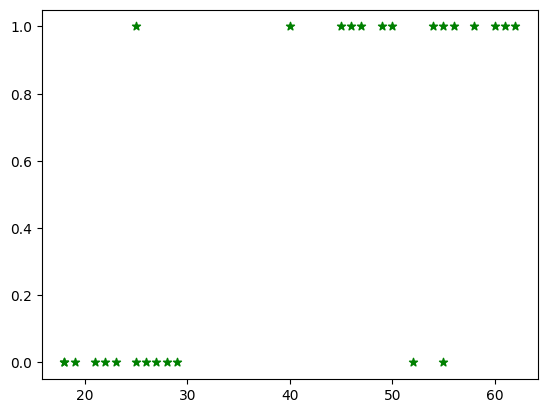

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='g')

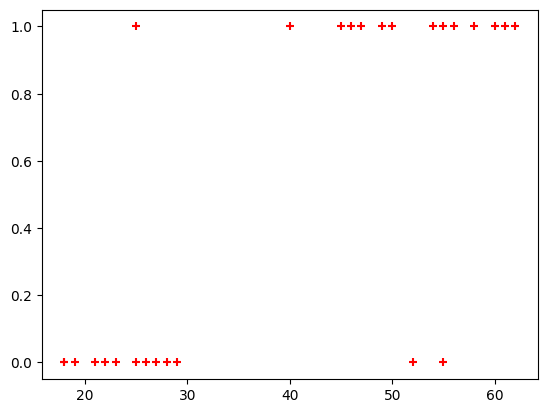

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8,random_state=10)
print(len(X_train),len(X_test))

21 6


In [8]:
X_test.head()

,age
7,60
5,56
18,19
21,26
11,28


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [25]:
y_predicted = model.predict(X_test)

In [26]:
len(y_predicted)

6

In [27]:
model.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [28]:
model.score(X_test,y_test)

1.0

In [29]:
y_predicted=pd.DataFrame(y_predicted,columns=['result'])

In [39]:
import numpy as np
print(model.predict(np.array([[40]])))

[1]


c:\Users\shivaraj_l\.conda\envs\shiva\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [92]:
y_predicted

,result
0,1
1,1
2,0
3,0
4,0
5,0


In [88]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [90]:
resultdf=pd.concat([X_test,y_predicted],axis='columns')
resultdf

,age,result
7,60.0,NaN
5,56.0,0.0
18,19.0,NaN
21,26.0,NaN
11,28.0,NaN
1,25.0,1.0
0,NaN,1.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0


**model.coef_ indicates value of m in y=m*x + b equation**

In [55]:
model.coef_

array([[0.11277822]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [56]:
model.intercept_

array([-4.2028033])

**Lets defined sigmoid function now and do the math with hand**

In [57]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [58]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [59]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [60]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

# Load a dataset
iris = load_iris()
X = iris.data
y = iris.target

# Using random_state for reproducibility
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

# Without using random_state (different split each time)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=None)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=None)

# Different fixed random_state values (different but reproducible splits)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=7)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.3, random_state=42)

# Check if splits are the same
print(np.array_equal(X_train1, X_train2))  # True
print(np.array_equal(X_train3, X_train4))  # False
print(np.array_equal(X_train5, X_train6))  # False


True
False
False


In [9]:
import math

eulers_number = math.e
print(eulers_number)


2.718281828459045


In [12]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Test the function
z_values = [-5, -2, 9, 2, 5]
for z in z_values:
    result = sigmoid(z)
    print(f"sigmoid({z}) = {result:.4f}")

sigmoid(-5) = 0.0067
sigmoid(-2) = 0.1192
sigmoid(9) = 0.9999
sigmoid(2) = 0.8808
sigmoid(5) = 0.9933


In [15]:
print(1/(1+pow(2.71, -200))) 

1.0
